In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('milk_quality_data.csv')

df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
df.shape

(1059, 8)

In [4]:
df.isna().sum()

ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64

In [5]:
grade_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['grade'] = df['grade'].map(grade_mapping)

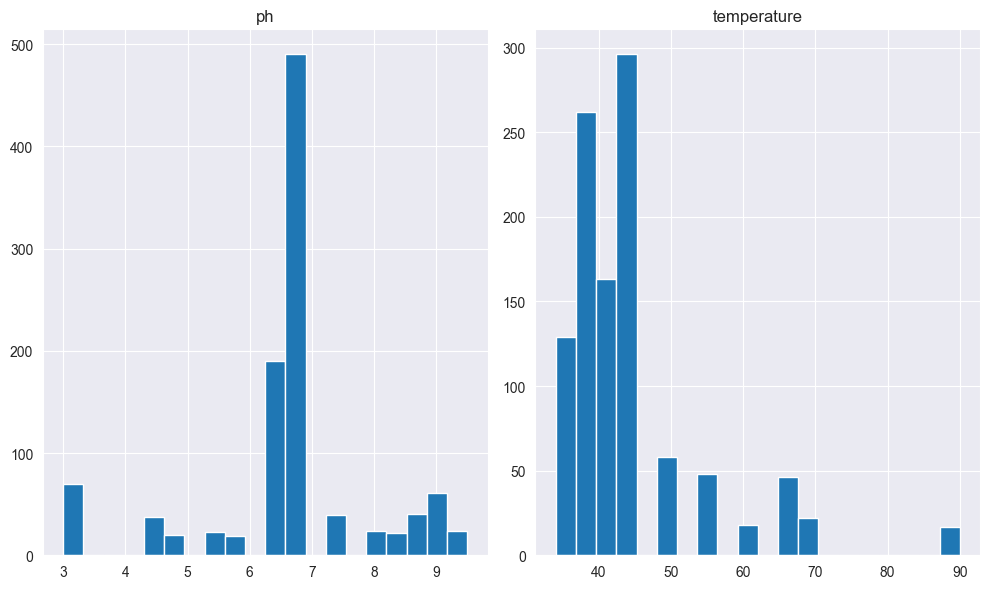

In [6]:
import matplotlib.pyplot as plt

df[['ph', 'temperature']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [7]:
X = df[['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour']]
y = df['grade']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print(accuracy_score(y_test, lr_pred))

0.8522012578616353


In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
print(accuracy_score(y_test, dt_pred))

0.9937106918238994


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=50)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
print(accuracy_score(y_test,  gb_pred))

0.9905660377358491


In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
print(accuracy_score(y_test,xgb_pred))

0.9968553459119497


In [13]:
xgb_model_hyper = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5)
xgb_model_hyper.fit(X_train, y_train)

xgb_hyper_pred = xgb_model_hyper.predict(X_test)
print(accuracy_score(y_test, xgb_hyper_pred))

0.9968553459119497


In [14]:
print(classification_report(y_test, xgb_hyper_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [15]:
print(confusion_matrix(y_test, xgb_hyper_pred))

[[114   1   0]
 [  0 127   0]
 [  0   0  76]]
